In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import scipy.stats as stats #for hypothesis testing
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("D:\Credit Default Project\data.csv")

In [3]:
data.head()

,id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.describe()

,id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


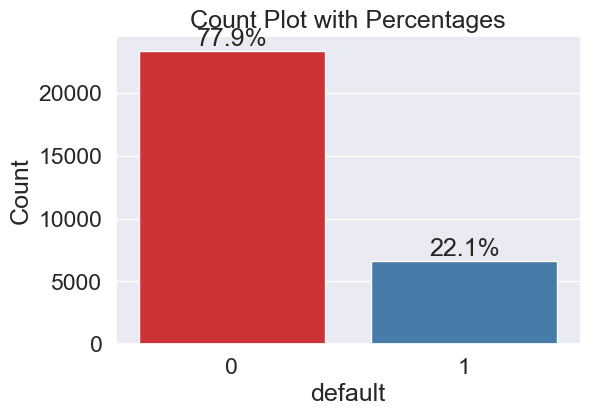

In [13]:
# Create a count plot with percentage labels
plt.figure(figsize=(6, 4))
variable = 'default'
ax = sns.countplot(x=variable, data=data, palette="Set1")

# Add percentage labels on top of the bars
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom') #(x,y) co-ordinate

plt.xlabel(variable)
plt.ylabel("Count")
plt.title("Count Plot with Percentages")
plt.show()

In [3]:
#In the given code, t-tests are performed to compare the means of different numerical variables between two groups: 
#default payment status 0 (non-default) and 1 (default). The hypothesis can be stated as follows:
#Null Hypothesis (H0): There is no significant difference in the means of the numerical variable between the default
#payment status groups.
#Alternative Hypothesis (H1): There is a significant difference in the means of the numerical variable between the
#default payment status groups.
# Segregate data based on default payment status
default_0_data = data[data['default'] == 0]
default_1_data = data[data['default'] == 1]

# Select numerical variables
numerical_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']  
ttest_results = pd.DataFrame(columns=['feature', 't_value', 'p_value'])

# Perform t-tests for difference of means
for var in numerical_vars:
    group_0_values = default_0_data[var]
    group_1_values = default_1_data[var]
    
    # Perform the t-test
    t_statistic, p_value = stats.ttest_ind(group_0_values, group_1_values)
    
   
    ttest_results = ttest_results.append({'feature': var, 't_value': t_statistic, 'p_value': p_value}, ignore_index=True)

    ttest_results = ttest_results.sort_values('p_value')
print(ttest_results)

      feature    t_value        p_value
0   LIMIT_BAL  26.908522  1.302244e-157
1    PAY_AMT1  12.665063   1.146488e-36
2    PAY_AMT2  10.163244   3.166657e-24
3    PAY_AMT4   9.858397   6.830942e-23
4    PAY_AMT3   9.757972   1.841770e-22
5    PAY_AMT5   9.561893   1.241345e-21
13   PAY_AMT6   9.224372   3.033589e-20
6   BILL_AMT1   3.403018   6.673295e-04
7   BILL_AMT2   2.458503   1.395736e-02
8   BILL_AMT3   2.438112   1.476998e-02
9         AGE  -2.405942   1.613685e-02
10  BILL_AMT4   1.759189   7.855564e-02
11  BILL_AMT5   1.170934   2.416344e-01
12  BILL_AMT6   0.930495   3.521225e-01


In [4]:
# Select the categorical variables for the chi-square test
#H0: There is no association between the categorical variables nad the default payment status
#H1: There is an association between the categorical variable and the default payment status
categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
chisq_results = pd.DataFrame(columns=['feature', 'chisq_stat', 'p_value'])
# Perform the chi-square test of independence for each variable pair
# Perform the chi-square test of independence for each variable
for var in categorical_vars:
    contingency_table = pd.crosstab(data[var], data['default'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    chisq_results = chisq_results.append({'feature': var, 'chisq_stat': chi2, 'p_value': p_value}, ignore_index=True)

# sort DataFrame by p-value
chisq_results = chisq_results.sort_values('p_value')

# print DataFrame
print(chisq_results)

     feature   chisq_stat       p_value
3      PAY_1  5365.964977  0.000000e+00
4      PAY_2  3474.466790  0.000000e+00
5      PAY_3  2622.462128  0.000000e+00
6      PAY_4  2341.469945  0.000000e+00
7      PAY_5  2197.694901  0.000000e+00
8      PAY_6  1886.835309  0.000000e+00
1  EDUCATION   163.216558  1.233263e-32
0        SEX    47.708797  4.944679e-12
2   MARRIAGE    35.662396  8.825862e-08


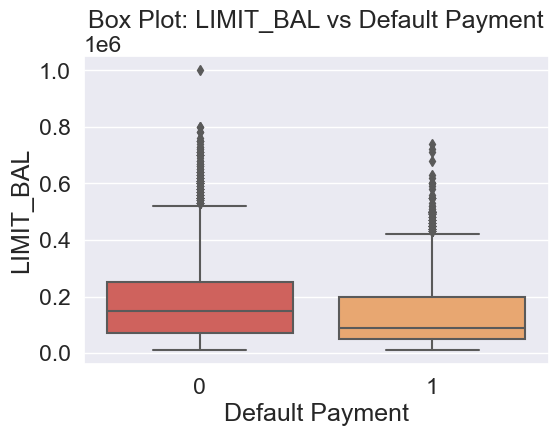

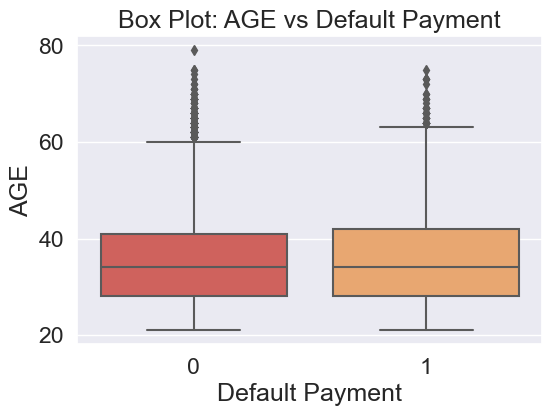

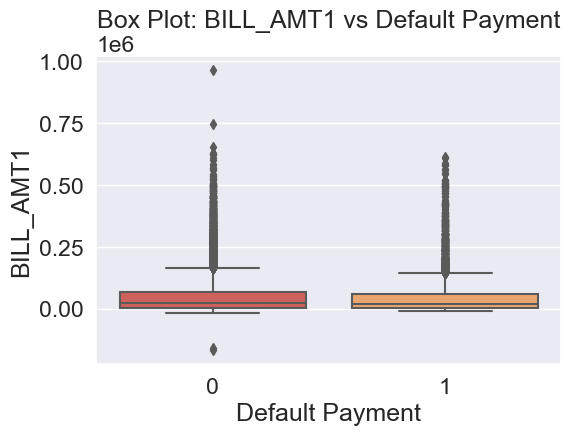

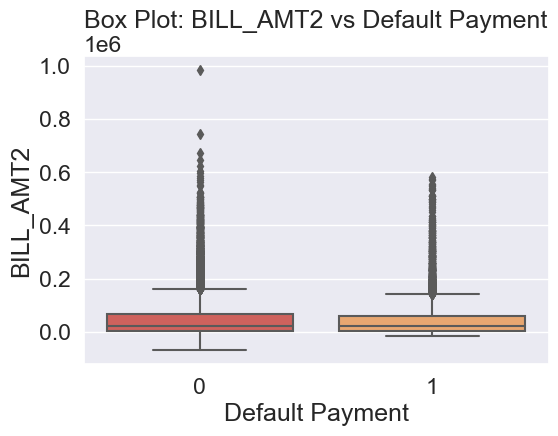

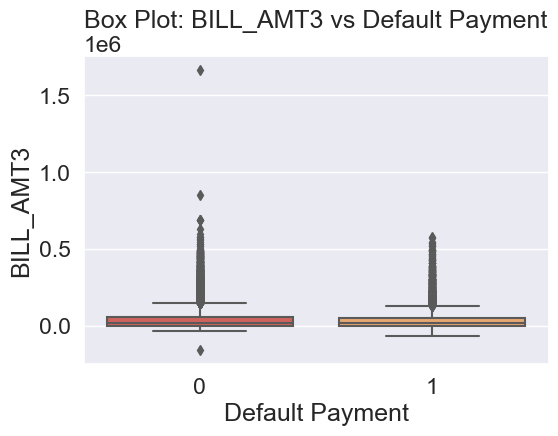

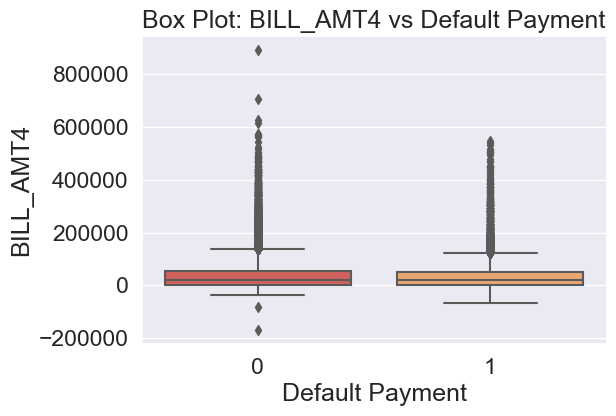

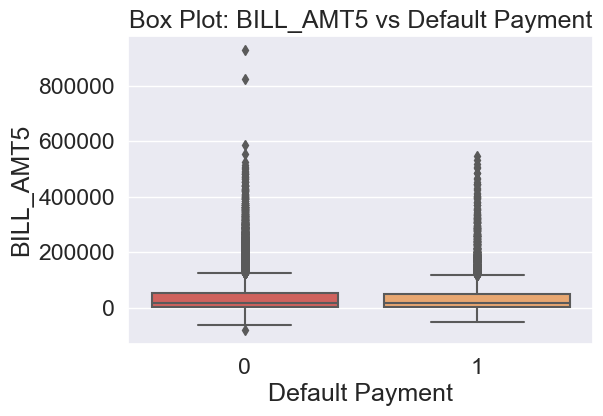

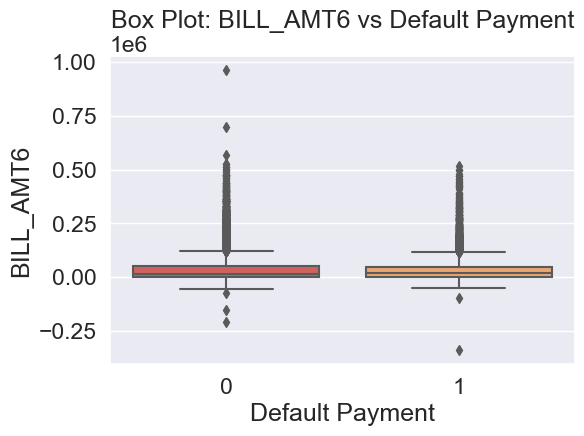

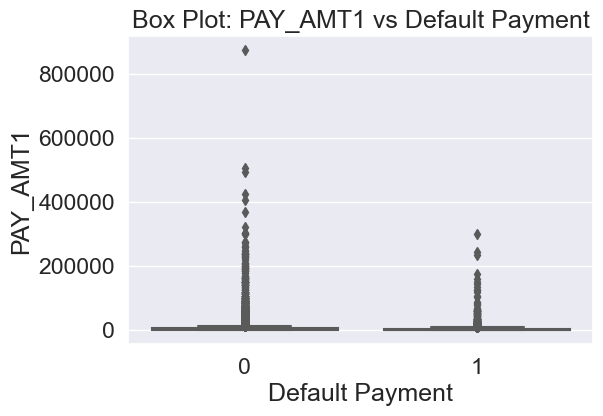

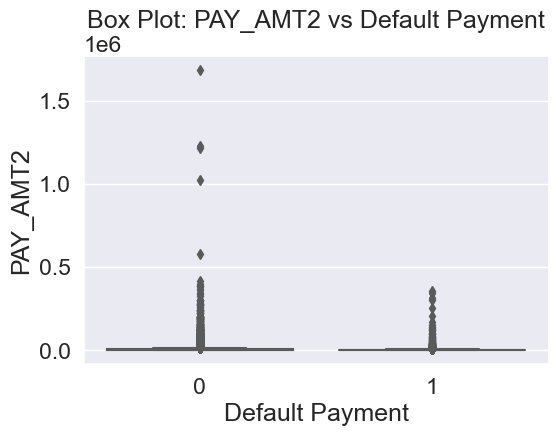

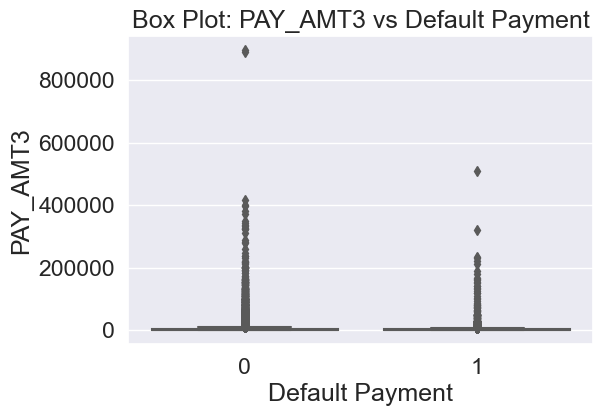

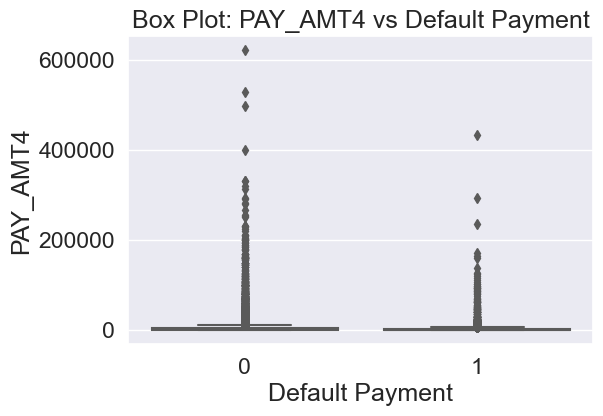

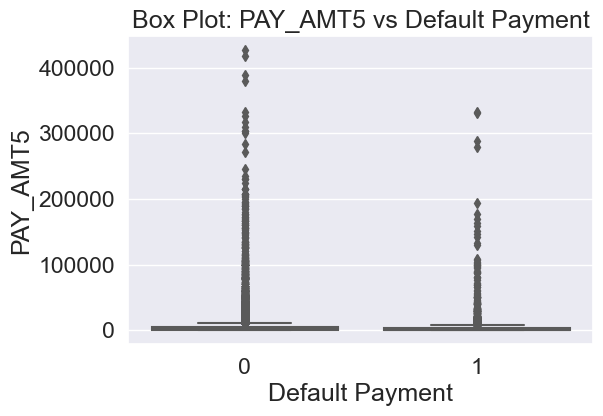

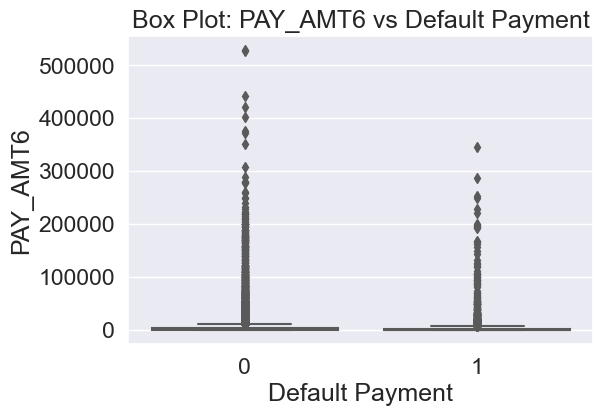

In [35]:
# box plot between default and each numerical predictor variable
# Select predictor variables
predictor_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

# Create box plots for each predictor variable
for var in predictor_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='default', y=var, data=data)
    plt.xlabel('Default Payment')
    plt.ylabel(var)
    plt.title(f"Box Plot: {var} vs Default Payment")
    plt.show()

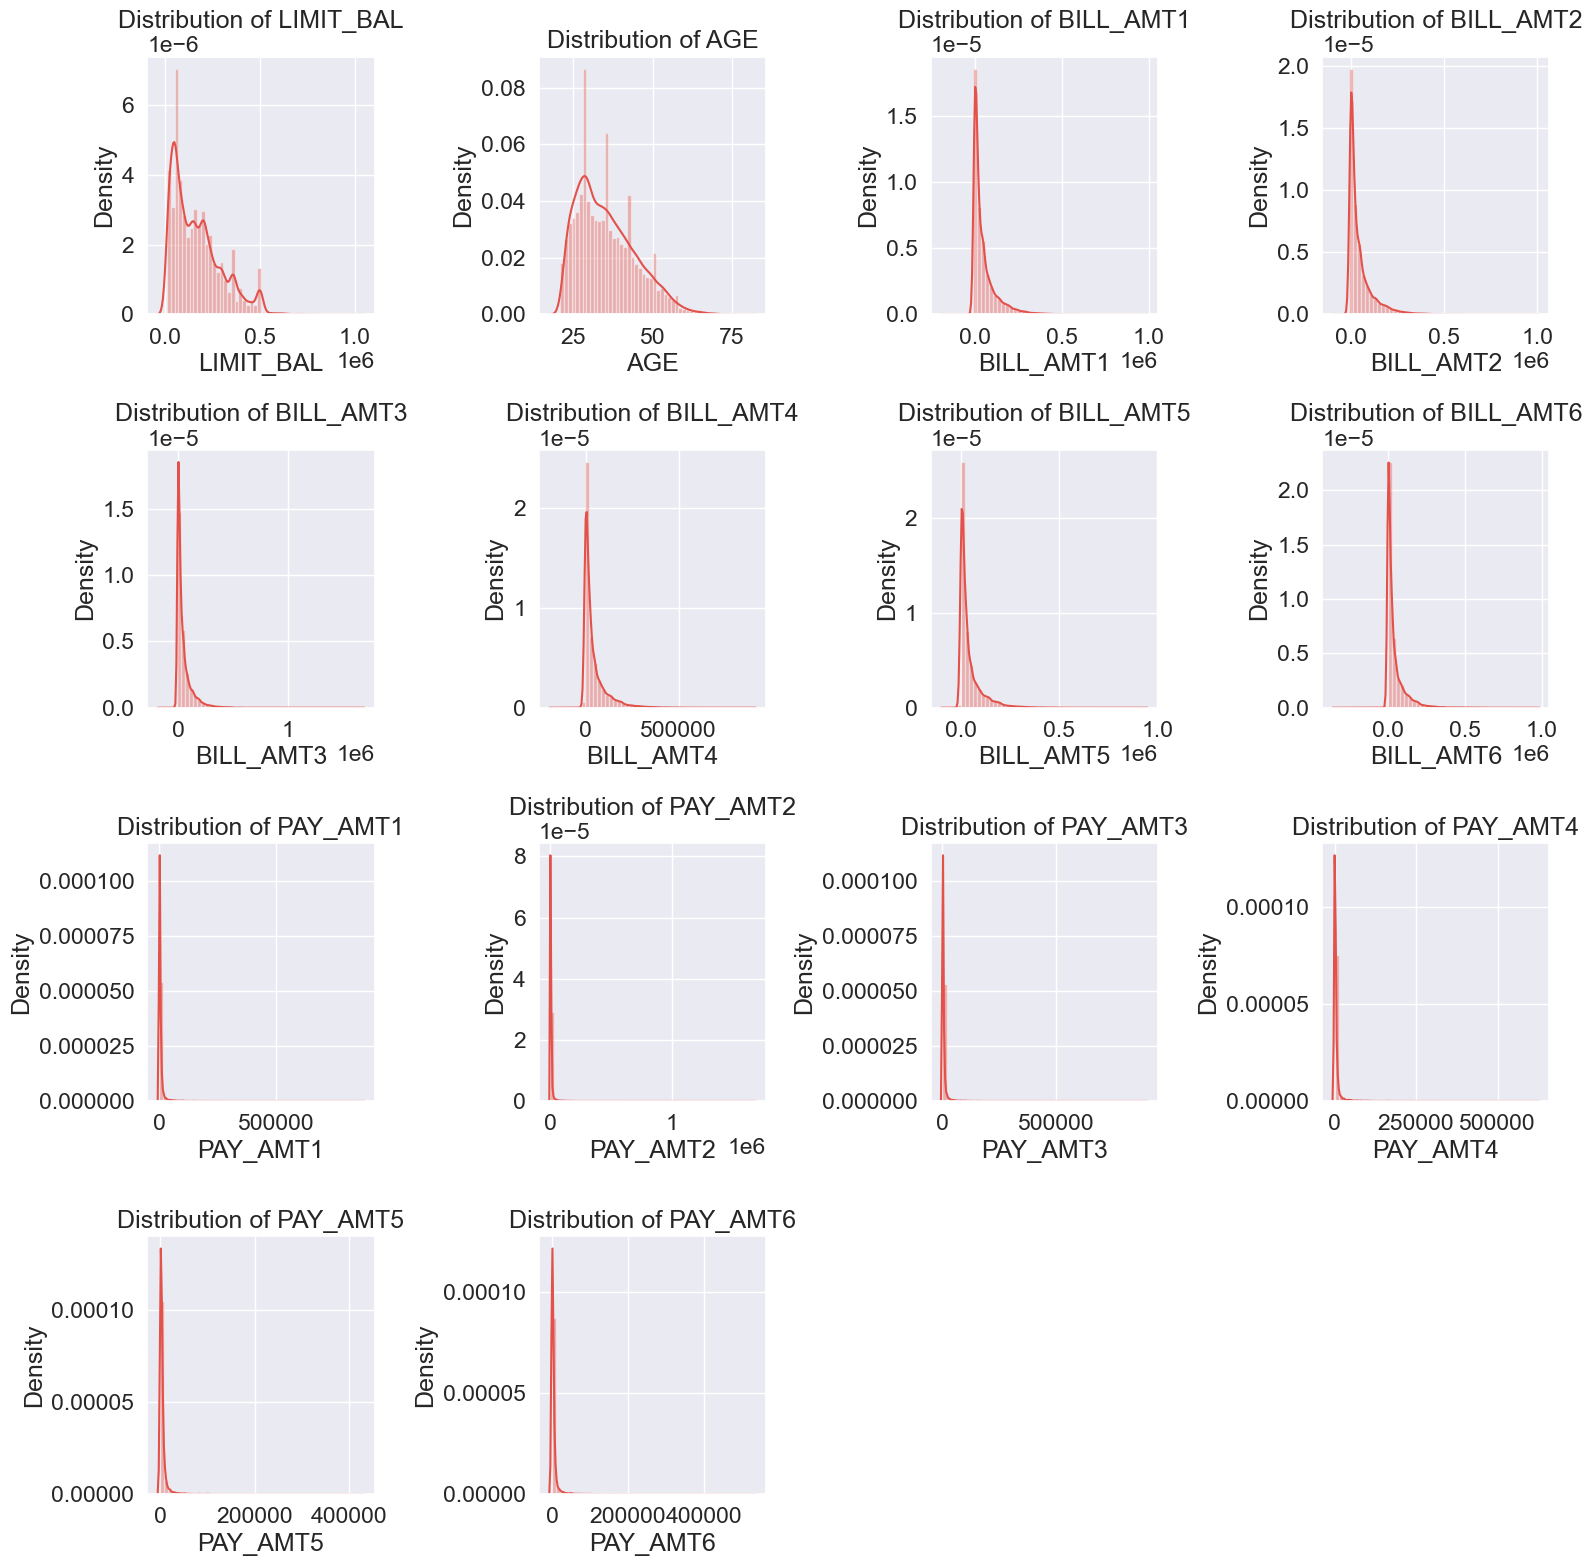

In [36]:
plt.figure(figsize=(16, 16))

# Plot distplots for each selected column
for i, column in enumerate(predictor_vars, 1):
    plt.subplot(4, 4, i)
    sns.distplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

In [3]:
data=data.drop(['id'],axis=1)

<Axes: >

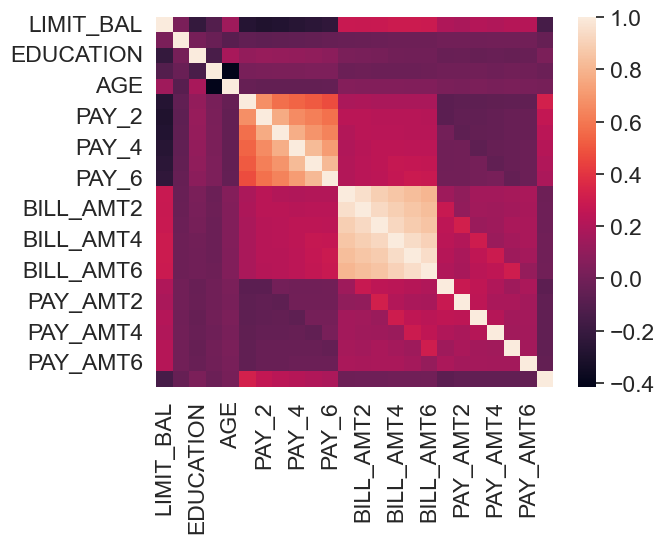

In [42]:
correlation = data. corr()
sns. heatmap (correlation) #this will make sense for numerical variables only

In [45]:
from scipy.stats import chi2_contingency
# Initialize an empty DataFrame to store results
chisq_results = pd.DataFrame(columns=['Feature1', 'Feature2', 'Chi-Squared Statistic', 'P-value'])

# Perform chi-squared tests of independence between pairs of categorical variables
for i in range(len(categorical_vars)):
    for j in range(i + 1, len(categorical_vars)):
        feature1 = categorical_vars[i]
        feature2 = categorical_vars[j]
        
        # Create a contingency table
        contingency_table = pd.crosstab(data[feature1], data[feature2])
        
        # Perform the chi-squared test of independence
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        
        # Append results to the DataFrame
        chisq_results = chisq_results.append({'Feature1': feature1, 'Feature2': feature2, 'Chi-Squared Statistic': chi2, 'P-value': p_value}, ignore_index=True)

# Sort DataFrame by p-value
chisq_results = chisq_results.sort_values('P-value')

# Print the results
print(chisq_results)

     Feature1   Feature2  Chi-Squared Statistic        P-value
35      PAY_5      PAY_6          114070.773069   0.000000e+00
28      PAY_2      PAY_5           40259.479116   0.000000e+00
27      PAY_2      PAY_4           69739.913715   0.000000e+00
26      PAY_2      PAY_3          117809.227373   0.000000e+00
25      PAY_1      PAY_6           26637.074214   0.000000e+00
24      PAY_1      PAY_5           34552.546268   0.000000e+00
23      PAY_1      PAY_4           52181.923957   0.000000e+00
22      PAY_1      PAY_3           81016.470422   0.000000e+00
21      PAY_1      PAY_2          131599.755276   0.000000e+00
31      PAY_3      PAY_5           70796.051397   0.000000e+00
34      PAY_4      PAY_6           81782.431108   0.000000e+00
29      PAY_2      PAY_6           29864.295475   0.000000e+00
30      PAY_3      PAY_4          115139.029521   0.000000e+00
33      PAY_4      PAY_5          116026.714904   0.000000e+00
32      PAY_3      PAY_6           51610.158519   0.000

# Train test split

In [12]:
# train test split
X = data.iloc[:, 0:23]
y = data['default']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

# Preprocessing

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_features', num_transformer, num_features),
        ('cat_features', cat_transformer, cat_features)
    ])

# Fit and transform the numerical and categorical features of the training data
X_train_processed1 = preprocessor.fit_transform(X_train)

# Transform the numerical and categorical features of the test data
X_test_processed1 = preprocessor.transform(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
def plot_confusion(prediction):
    conmat = np.array(confusion_matrix(y_test, prediction, labels=[1,0]))
    confusion = pd.DataFrame(conmat, index=['default', 'not default'], 
                             columns=['predicted default', 'predicted not default'])
    print(confusion)

# Fitting the model (recursive feature elimination)

In [14]:
from sklearn.metrics import make_scorer, roc_auc_score
logreg = LogisticRegression(solver='liblinear')
param_grid = {'C': [0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1','l2']}
scorer = make_scorer(roc_auc_score, needs_prob = True)
grid = GridSearchCV(logreg, param_grid, cv = 5, scoring = scorer)
grid.fit(X_train_processed1, y_train)

best_model = grid.best_estimator_
y_pred_proba = best_model.predict_proba(X_test_processed1)


roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print("Best Parameters:", grid.best_params_)
print("Best ROC AUC Score:", grid.best_score_)
print("Testing ROC AUC Score:", roc_auc)

Best Parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l1'}
Best ROC AUC Score: nan
Testing ROC AUC Score: 0.7221108069044312


In [25]:
from sklearn.feature_selection import RFECV
lr = LogisticRegression(penalty='l1', C=0.01, solver='liblinear', class_weight='balanced')
rfecv = RFECV(estimator=lr, scoring='roc_auc')
model = rfecv.fit(X_train_processed1, y_train)
lr_pred = model.predict(X_test_processed1)
lr_prob = model.decision_function(X_test_processed1)
print('Test score: ', model.score(X_test_processed1, y_test))

Test score:  0.6923333333333334


In [19]:
plot_confusion(lr_pred)

             predicted default  predicted not default
default                    851                    486
not default               1360                   3303


In [20]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      4663
           1       0.38      0.64      0.48      1337

    accuracy                           0.69      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.76      0.69      0.71      6000



In [21]:
roc_auc = roc_auc_score(y_test, lr_prob)
print('ROC-AUC on Test Set:', roc_auc)

ROC-AUC on Test Set: 0.7231226073397877


In [23]:
# Get the selected features
selected_features = X_train.columns[rfecv.support_]

# Get the coefficients of the selected features from the underlying Logistic Regression model
coefficients = model.estimator_.coef_

# Print the selected features and their coefficients
for feature, coef in zip(selected_features, coefficients[0]):
    print(f"Feature: {feature}, Coefficient: {coef}")

Feature: LIMIT_BAL, Coefficient: -0.07961005805429668
Feature: SEX, Coefficient: -0.024539301202865495
Feature: EDUCATION, Coefficient: -0.03936552201355455
Feature: MARRIAGE, Coefficient: -0.05318428934035031
Feature: AGE, Coefficient: 0.06238018878209454
Feature: PAY_1, Coefficient: 0.5647074816616517
Feature: PAY_2, Coefficient: 0.13242230906018354
Feature: PAY_3, Coefficient: 0.05191680699663364
Feature: PAY_4, Coefficient: 0.034312273835313226
Feature: PAY_5, Coefficient: 0.012590200848599709
Feature: BILL_AMT1, Coefficient: -0.12543482499179023
Feature: BILL_AMT3, Coefficient: 0.0
Feature: PAY_AMT1, Coefficient: -0.13199879964645875
Feature: PAY_AMT2, Coefficient: -0.08997802130434505
Feature: PAY_AMT3, Coefficient: -0.02633704464348909
Feature: PAY_AMT4, Coefficient: -0.03771487214648459
Feature: PAY_AMT5, Coefficient: -0.04088764082064896
Feature: PAY_AMT6, Coefficient: -0.009213744869785543


# If explanatory variable increases by 1 unit, log of odds of y=1 increases by beta units (where beta is the coefficient)

For pay_2 i.e. payment status in august, there is a positive coeff but the scaling of the status is as follows -2= no transactions history,-1=paid duly,0=revolving ,1=payment delay for one month ,2= payment delay for 2 months ,….,9=payment delay for 9 months or more. So if paid duly or no transactions history then log of odds of defaulting decreases. We can see that lasso regression has by itself removed many useless variables which also posed issues of multicollinearity

# PCA

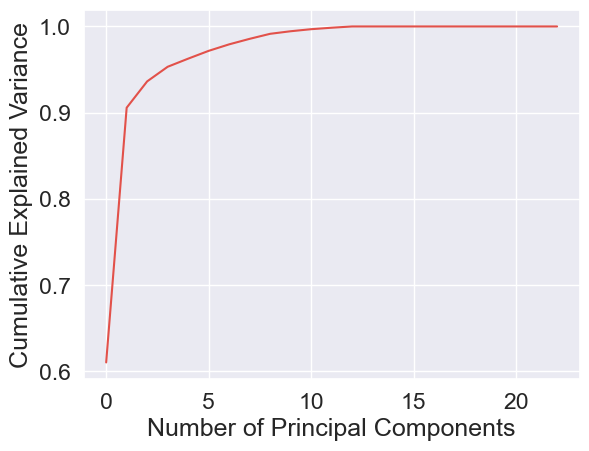

In [5]:
from sklearn.decomposition import PCA

# Assuming X is your data
pca = PCA()
pca.fit(X)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, roc_auc_score

# Create a pipeline with PCA and Logistic Regression
pipeline = Pipeline([
    ('pca', PCA()),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

# Define hyperparameters to tune
param_grid = {
    'pca__n_components': [5, 6, 7, 8, 9, 10],  # You can adjust the number of components
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
}

# Define the scoring metric as ROC AUC
scorer = make_scorer(roc_auc_score)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,  # You can adjust the number of cross-validation folds
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model with grid search
grid_search.fit(X_train_processed1, y_train)

# Print the best parameters and corresponding ROC AUC score
print("Best Parameters: ", grid_search.best_params_)
print("Best ROC AUC Score: {:.4f}".format(grid_search.best_score_))

# Calculate ROC AUC on the test set
y_pred_prob_test = grid_search.predict_proba(X_test_processed1)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_prob_test)
print("ROC AUC on Test Set: {:.4f}".format(roc_auc_test))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters:  {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'pca__n_components': 10}
Best ROC AUC Score: 0.6464
ROC AUC on Test Set: 0.7081


In [25]:
best_params = {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'pca__n_components': 10}

model = Pipeline([
    ('pca', PCA(n_components=best_params['pca__n_components'])),
    ('classifier', LogisticRegression(C=best_params['classifier__C'], penalty=best_params['classifier__penalty'], class_weight='balanced'))
])

model.fit(X_train_processed1, y_train)

# Predict probabilities on the test set
y_pred_test = model.predict(X_test_processed1)
y_pred_prob_test = model.predict_proba(X_test_processed1)[:, 1]

# Calculate ROC AUC on the test set
roc_auc_test = roc_auc_score(y_test, y_pred_prob_test)
print("ROC AUC on Test Set: {:.4f}".format(roc_auc_test))

ROC AUC on Test Set: 0.7081


In [26]:
plot_confusion(y_pred_test)

             predicted default  predicted not default
default                    859                    478
not default               1638                   3025


In [27]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74      4663
           1       0.34      0.64      0.45      1337

    accuracy                           0.65      6000
   macro avg       0.60      0.65      0.59      6000
weighted avg       0.75      0.65      0.68      6000

